In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Load data
data = pd.read_excel('D:\SAS Hackathon\SAS_Workshop_Materials\SAS_Workshop_Materials\SAS_Materials\Hackathon Dataset and Evaluation\MDX_SAS_Data.xlsx')

In [2]:
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,date,sales,sell_price,snap_CA,snap_TX,snap_WI
0,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,2014-01-31,0,224,1,1,0
1,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,2014-02-28,18,224,1,1,0
2,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,2014-03-31,21,224,1,1,0
3,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,2014-04-30,30,224,1,1,0
4,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,2014-05-31,29,224,1,1,0


In [3]:
data.shape

(853720, 12)

In [4]:
data.describe()

,sales,sell_price,snap_CA,snap_TX,snap_WI
count,853720.000000,853720.000000,853720.0,853720.0,853720.0
mean,37.062777,430.988310,1.0,1.0,0.0
std,89.612694,355.574286,0.0,0.0,0.0
min,0.000000,0.000000,1.0,1.0,0.0
25%,4.000000,198.000000,1.0,1.0,0.0
50%,14.000000,328.000000,1.0,1.0,0.0
75%,36.000000,572.000000,1.0,1.0,0.0
max,4594.000000,4488.000000,1.0,1.0,0.0


In [5]:
data.isnull().sum()

id            0
item_id       0
dept_id       0
cat_id        0
store_id      0
state_id      0
date          0
sales         0
sell_price    0
snap_CA       0
snap_TX       0
snap_WI       0
dtype: int64

In [6]:
data.isna().sum()

id            0
item_id       0
dept_id       0
cat_id        0
store_id      0
state_id      0
date          0
sales         0
sell_price    0
snap_CA       0
snap_TX       0
snap_WI       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853720 entries, 0 to 853719
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          853720 non-null  object        
 1   item_id     853720 non-null  object        
 2   dept_id     853720 non-null  object        
 3   cat_id      853720 non-null  object        
 4   store_id    853720 non-null  object        
 5   state_id    853720 non-null  object        
 6   date        853720 non-null  datetime64[ns]
 7   sales       853720 non-null  int64         
 8   sell_price  853720 non-null  int64         
 9   snap_CA     853720 non-null  int64         
 10  snap_TX     853720 non-null  int64         
 11  snap_WI     853720 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 78.2+ MB


In [8]:
missing_values = data.isnull().sum()
print(missing_values)

id            0
item_id       0
dept_id       0
cat_id        0
store_id      0
state_id      0
date          0
sales         0
sell_price    0
snap_CA       0
snap_TX       0
snap_WI       0
dtype: int64


In [9]:
unique_values = data.nunique()
print(unique_values)

id            30490
item_id        3049
dept_id           7
cat_id            3
store_id         10
state_id          3
date             28
sales          1687
sell_price     1526
snap_CA           1
snap_TX           1
snap_WI           1
dtype: int64


In [10]:
df = data.copy()

In [11]:
# Split dataset by cat_id
foods_df = df[df['cat_id'] == 'FOODS']
hobbies_df = df[df['cat_id'] == 'HOBBIES']
household_df = df[df['cat_id'] == 'HOUSEHOLD']

In [12]:
foods_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,date,sales,sell_price,snap_CA,snap_TX,snap_WI
0,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,2014-01-31,0,224,1,1,0
1,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,2014-02-28,18,224,1,1,0
2,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,2014-03-31,21,224,1,1,0
3,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,2014-04-30,30,224,1,1,0
4,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,2014-05-31,29,224,1,1,0


In [13]:
from sklearn.ensemble import RandomForestRegressor


def train_model(df):
    # Define features and target
    features = ['snap_CA', 'snap_TX', 'snap_WI']
    target = 'sales'

    # Split the data
    X = df[features]
    y = df[target]

    # Train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    return model

# Train model for each category
print('FOODS Category:')
foods_model = train_model(foods_df)

print('HOBBIES Category:')
hobbies_model = train_model(hobbies_df)

print('HOUSEHOLD Category:')
household_model = train_model(household_df)


FOODS Category:
HOBBIES Category:
HOUSEHOLD Category:


In [14]:
def analyze_snap_impact(model):
    feature_importances = model.feature_importances_
    feature_names = ['snap_CA', 'snap_TX', 'snap_WI']

    snap_impact = {feature: importance for feature, importance in zip(feature_names, feature_importances)}
    return snap_impact

print('SNAP Impact for FOODS Category:', analyze_snap_impact(foods_model))
print('SNAP Impact for HOBBIES Category:', analyze_snap_impact(hobbies_model))
print('SNAP Impact for HOUSEHOLD Category:', analyze_snap_impact(household_model))


SNAP Impact for FOODS Category: {'snap_CA': 0.0, 'snap_TX': 0.0, 'snap_WI': 0.0}
SNAP Impact for HOBBIES Category: {'snap_CA': 0.0, 'snap_TX': 0.0, 'snap_WI': 0.0}
SNAP Impact for HOUSEHOLD Category: {'snap_CA': 0.0, 'snap_TX': 0.0, 'snap_WI': 0.0}


<ipython-input-15-aa0d61a78a88>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_data['date'] = pd.to_datetime(item_data['date'])


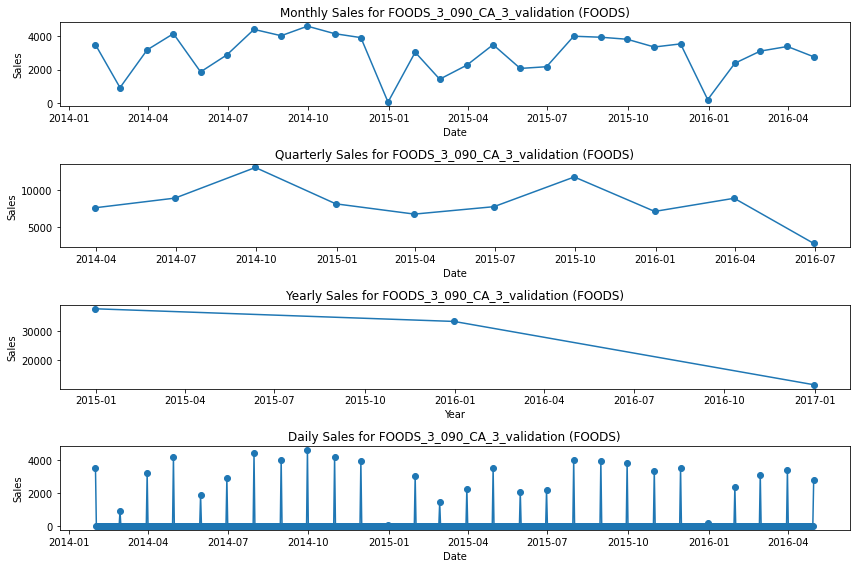

<ipython-input-15-aa0d61a78a88>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_data['date'] = pd.to_datetime(item_data['date'])


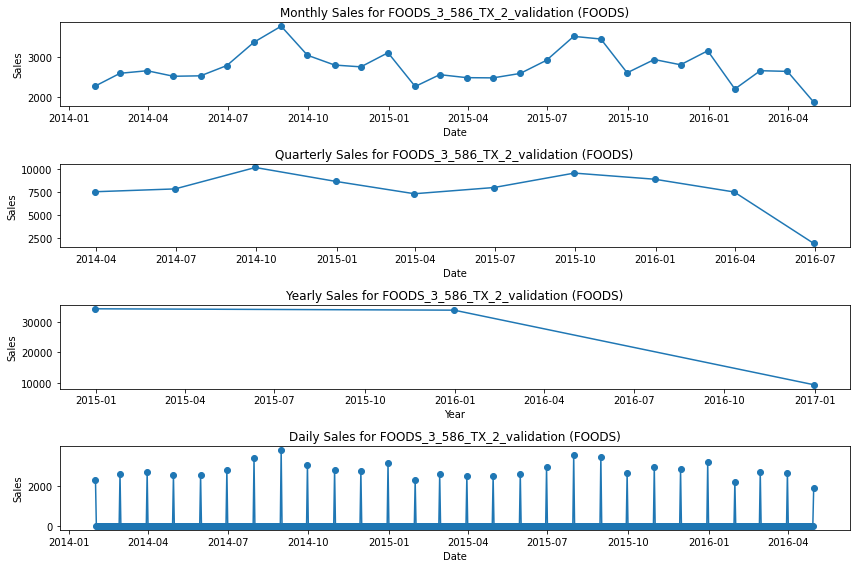

<ipython-input-15-aa0d61a78a88>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_data['date'] = pd.to_datetime(item_data['date'])


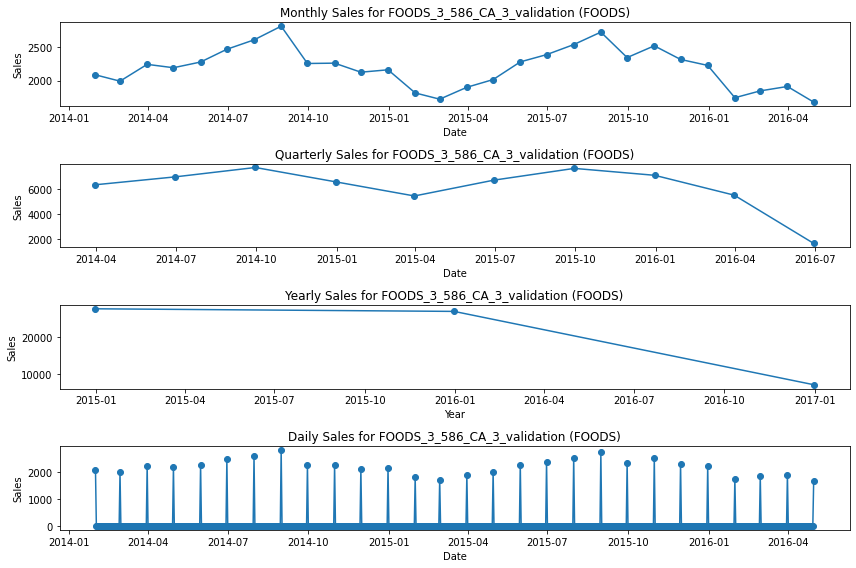

In [15]:
import matplotlib.pyplot as plt

# Group data by category and item, summing up the sales, then sort and get top 3 for each category
top_selling_foods = foods_df.groupby('id')['sales'].sum().nlargest(3)
top_selling_hobbies = hobbies_df.groupby('id')['sales'].sum().nlargest(3)
top_selling_household = household_df.groupby('id')['sales'].sum().nlargest(3)

# Visualize monthly, quarterly, yearly, and daily sales for top selling items in FOODS category
for item_id in top_selling_foods.index:
    item_data = foods_df[foods_df['id'] == item_id]
    
    # Ensure datetime index
    item_data['date'] = pd.to_datetime(item_data['date'])
    item_data.set_index('date', inplace=True)
    
    monthly_sales = item_data.resample('M')['sales'].sum()
    quarterly_sales = item_data.resample('Q')['sales'].sum()
    yearly_sales = item_data.resample('Y')['sales'].sum()
    daily_sales = item_data.resample('D')['sales'].sum()
    
    # Plotting
    plt.figure(figsize=(12, 8))
    plt.subplot(4, 1, 1)
    plt.plot(monthly_sales.index, monthly_sales, marker='o')
    plt.title(f'Monthly Sales for {item_id} (FOODS)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    
    plt.subplot(4, 1, 2)
    plt.plot(quarterly_sales.index, quarterly_sales, marker='o')
    plt.title(f'Quarterly Sales for {item_id} (FOODS)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    
    plt.subplot(4, 1, 3)
    plt.plot(yearly_sales.index, yearly_sales, marker='o')
    plt.title(f'Yearly Sales for {item_id} (FOODS)')
    plt.xlabel('Year')
    plt.ylabel('Sales')
    
    plt.subplot(4, 1, 4)
    plt.plot(daily_sales.index, daily_sales, marker='o')
    plt.title(f'Daily Sales for {item_id} (FOODS)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    
    plt.tight_layout()
    plt.show()

# Repeat the same for HOBBIES and HOUSEHOLD categories


<ipython-input-16-c17f8594b6c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_data['date'] = pd.to_datetime(item_data['date'])


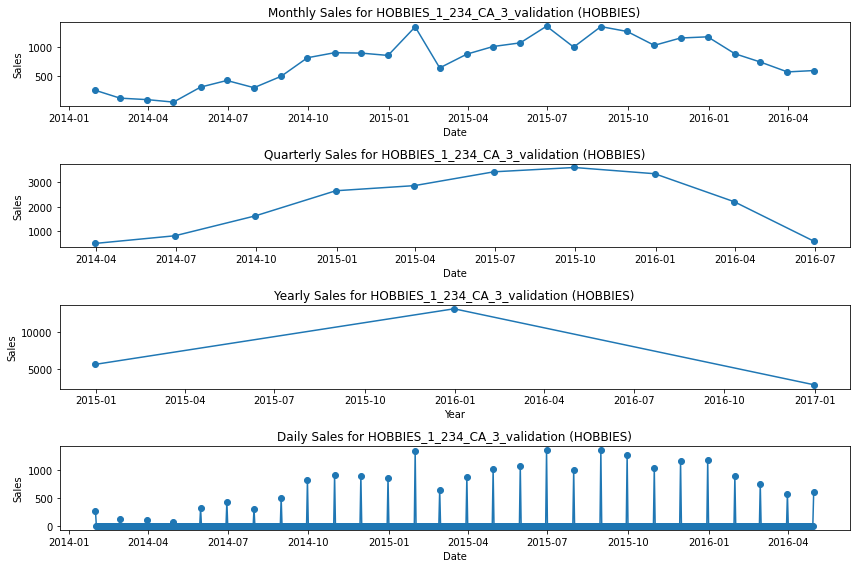

<ipython-input-16-c17f8594b6c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_data['date'] = pd.to_datetime(item_data['date'])


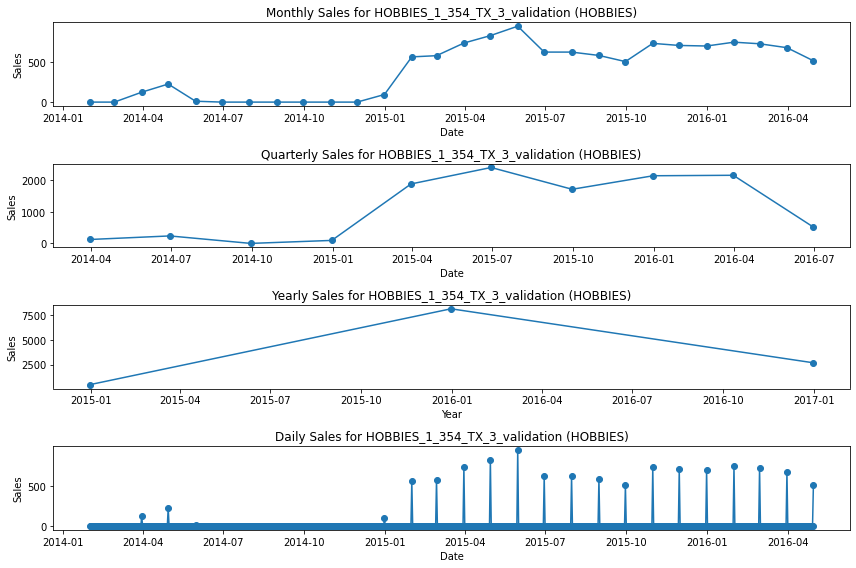

<ipython-input-16-c17f8594b6c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_data['date'] = pd.to_datetime(item_data['date'])


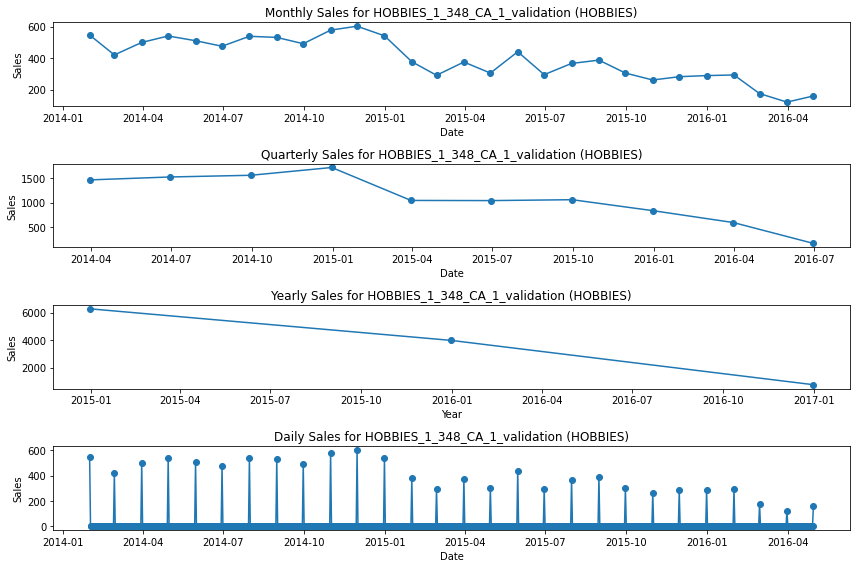

In [16]:
# Visualize monthly, quarterly, yearly, and daily sales for top selling items in HOBBIES category
for item_id in top_selling_hobbies.index:
    item_data = hobbies_df[hobbies_df['id'] == item_id]
    
    # Ensure datetime index
    item_data['date'] = pd.to_datetime(item_data['date'])
    item_data.set_index('date', inplace=True)
    
    monthly_sales = item_data.resample('M')['sales'].sum()
    quarterly_sales = item_data.resample('Q')['sales'].sum()
    yearly_sales = item_data.resample('Y')['sales'].sum()
    daily_sales = item_data.resample('D')['sales'].sum()
    
    # Plotting
    plt.figure(figsize=(12, 8))
    plt.subplot(4, 1, 1)
    plt.plot(monthly_sales.index, monthly_sales, marker='o')
    plt.title(f'Monthly Sales for {item_id} (HOBBIES)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    
    plt.subplot(4, 1, 2)
    plt.plot(quarterly_sales.index, quarterly_sales, marker='o')
    plt.title(f'Quarterly Sales for {item_id} (HOBBIES)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    
    plt.subplot(4, 1, 3)
    plt.plot(yearly_sales.index, yearly_sales, marker='o')
    plt.title(f'Yearly Sales for {item_id} (HOBBIES)')
    plt.xlabel('Year')
    plt.ylabel('Sales')
    
    plt.subplot(4, 1, 4)
    plt.plot(daily_sales.index, daily_sales, marker='o')
    plt.title(f'Daily Sales for {item_id} (HOBBIES)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    
    plt.tight_layout()
    plt.show()


<ipython-input-17-e0f02ac5a1f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_data['date'] = pd.to_datetime(item_data['date'])


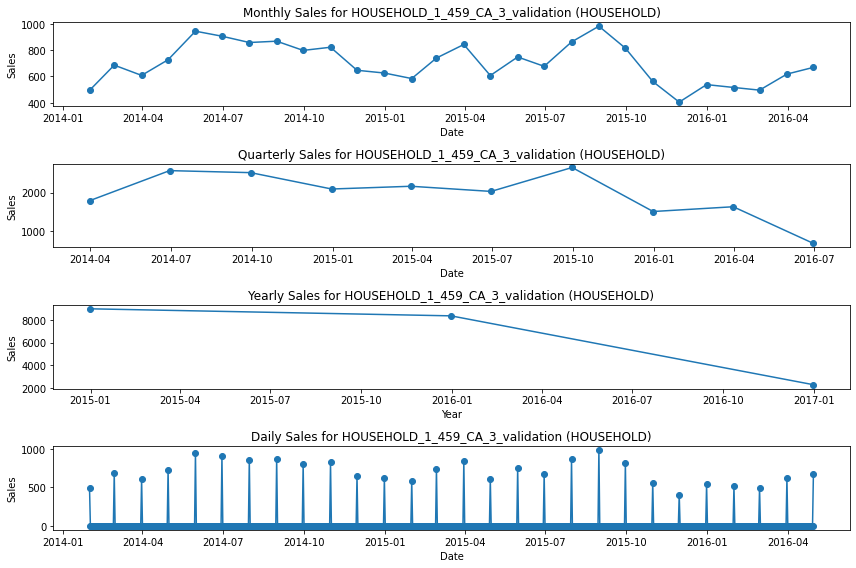

<ipython-input-17-e0f02ac5a1f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_data['date'] = pd.to_datetime(item_data['date'])


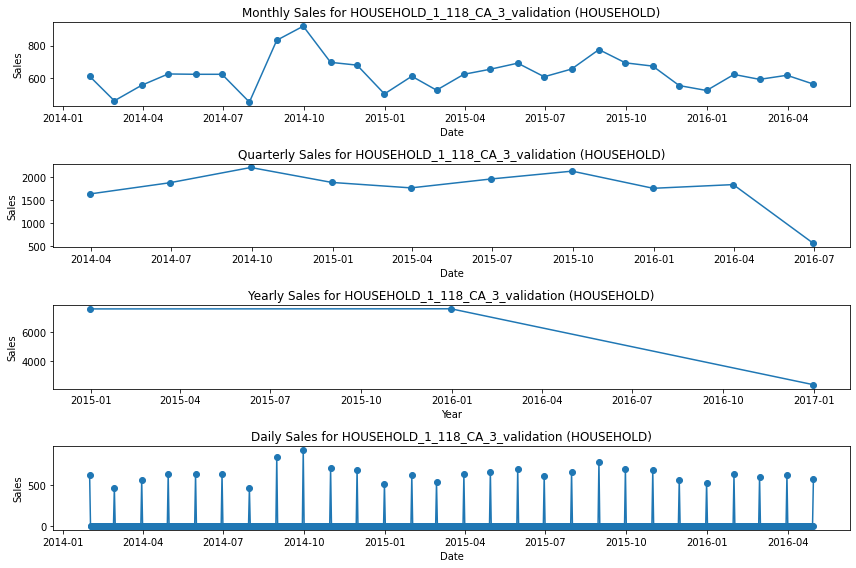

<ipython-input-17-e0f02ac5a1f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_data['date'] = pd.to_datetime(item_data['date'])


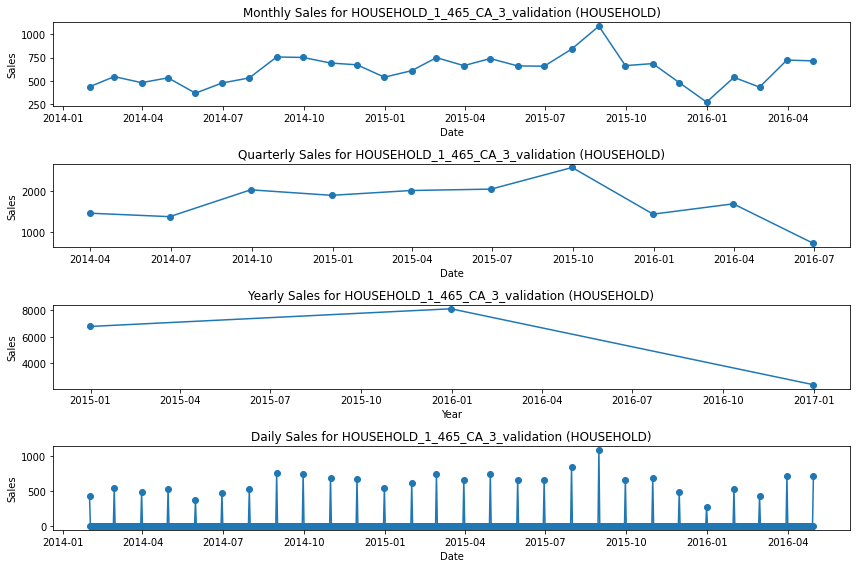

In [17]:
# Visualize monthly, quarterly, yearly, and daily sales for top selling items in HOUSEHOLD category
for item_id in top_selling_household.index:
    item_data = household_df[household_df['id'] == item_id]
    
    # Ensure datetime index
    item_data['date'] = pd.to_datetime(item_data['date'])
    item_data.set_index('date', inplace=True)
    
    monthly_sales = item_data.resample('M')['sales'].sum()
    quarterly_sales = item_data.resample('Q')['sales'].sum()
    yearly_sales = item_data.resample('Y')['sales'].sum()
    daily_sales = item_data.resample('D')['sales'].sum()
    
    # Plotting
    plt.figure(figsize=(12, 8))
    plt.subplot(4, 1, 1)
    plt.plot(monthly_sales.index, monthly_sales, marker='o')
    plt.title(f'Monthly Sales for {item_id} (HOUSEHOLD)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    
    plt.subplot(4, 1, 2)
    plt.plot(quarterly_sales.index, quarterly_sales, marker='o')
    plt.title(f'Quarterly Sales for {item_id} (HOUSEHOLD)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    
    plt.subplot(4, 1, 3)
    plt.plot(yearly_sales.index, yearly_sales, marker='o')
    plt.title(f'Yearly Sales for {item_id} (HOUSEHOLD)')
    plt.xlabel('Year')
    plt.ylabel('Sales')
    
    plt.subplot(4, 1, 4)
    plt.plot(daily_sales.index, daily_sales, marker='o')
    plt.title(f'Daily Sales for {item_id} (HOUSEHOLD)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    
    plt.tight_layout()
    plt.show()

In [18]:
# Create separate DataFrames for monthly sales of top items in FOODS category
foods_monthly_sales_dfs = {}
for item_id in top_selling_foods.index:
    item_data = foods_df[foods_df['id'] == item_id]
    item_data['date'] = pd.to_datetime(item_data['date'])
    item_data.set_index('date', inplace=True)
    monthly_sales = item_data.resample('M')['sales'].sum()
    foods_monthly_sales_dfs[item_id] = monthly_sales.to_frame()

# Create separate DataFrames for monthly sales of top items in HOBBIES category
hobbies_monthly_sales_dfs = {}
for item_id in top_selling_hobbies.index:
    item_data = hobbies_df[hobbies_df['id'] == item_id]
    item_data['date'] = pd.to_datetime(item_data['date'])
    item_data.set_index('date', inplace=True)
    monthly_sales = item_data.resample('M')['sales'].sum()
    hobbies_monthly_sales_dfs[item_id] = monthly_sales.to_frame()

# Create separate DataFrames for monthly sales of top items in HOUSEHOLD category
household_monthly_sales_dfs = {}
for item_id in top_selling_household.index:
    item_data = household_df[household_df['id'] == item_id]
    item_data['date'] = pd.to_datetime(item_data['date'])
    item_data.set_index('date', inplace=True)
    monthly_sales = item_data.resample('M')['sales'].sum()
    household_monthly_sales_dfs[item_id] = monthly_sales.to_frame()


<ipython-input-18-080b9e2a3ec4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_data['date'] = pd.to_datetime(item_data['date'])
<ipython-input-18-080b9e2a3ec4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_data['date'] = pd.to_datetime(item_data['date'])
<ipython-input-18-080b9e2a3ec4>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

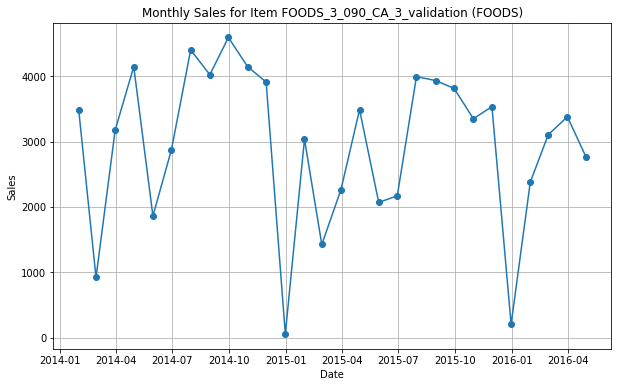

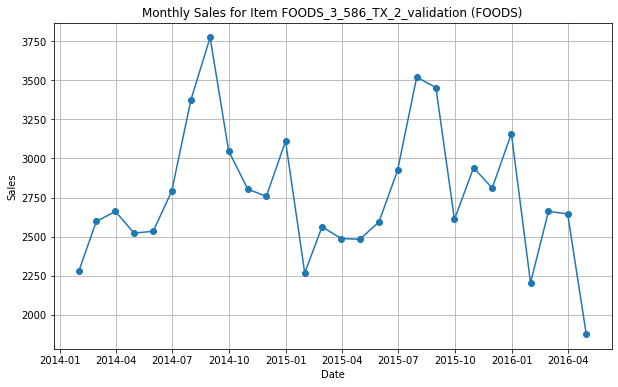

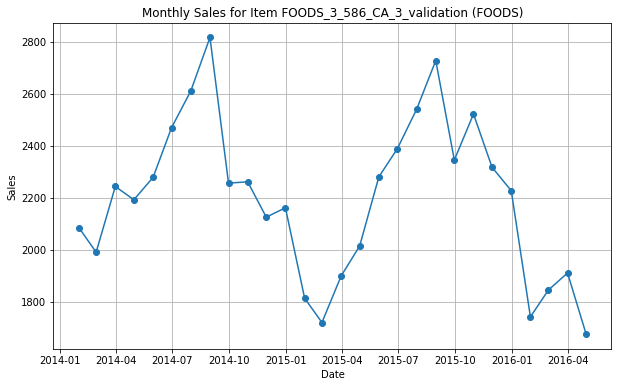

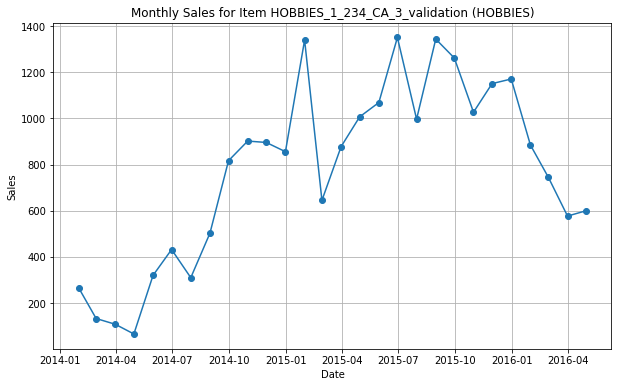

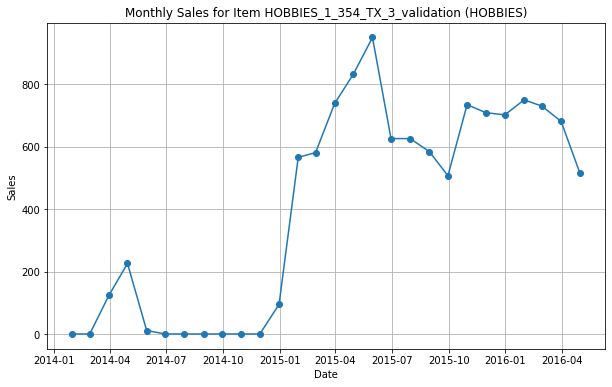

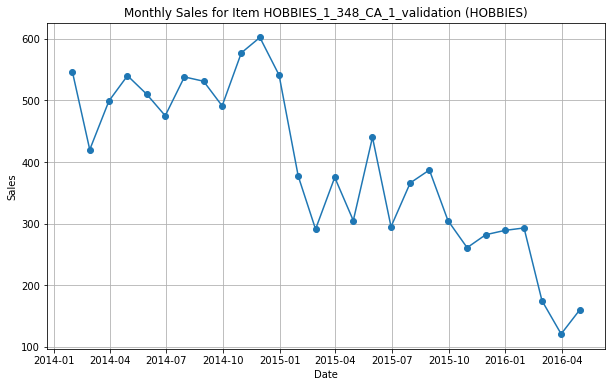

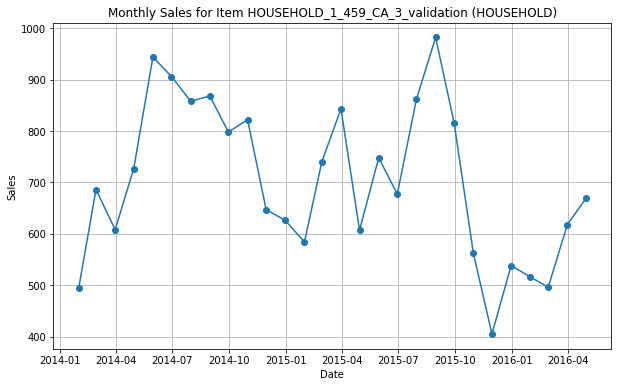

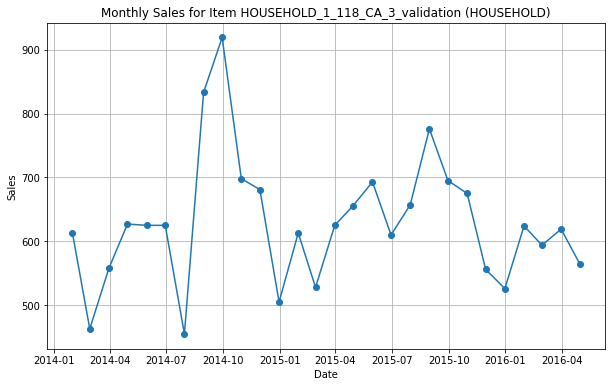

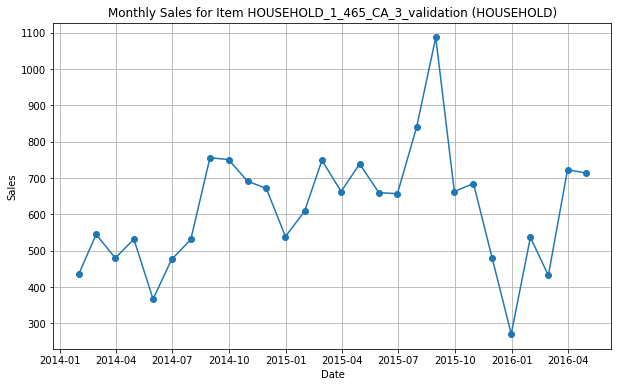

In [19]:
# Simple EDA for FOODS category
for item_id, monthly_sales_df in foods_monthly_sales_dfs.items():
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_sales_df.index, monthly_sales_df['sales'], marker='o')
    plt.title(f'Monthly Sales for Item {item_id} (FOODS)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.grid(True)
    plt.show()

# Simple EDA for HOBBIES category
for item_id, monthly_sales_df in hobbies_monthly_sales_dfs.items():
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_sales_df.index, monthly_sales_df['sales'], marker='o')
    plt.title(f'Monthly Sales for Item {item_id} (HOBBIES)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.grid(True)
    plt.show()

# Simple EDA for HOUSEHOLD category
for item_id, monthly_sales_df in household_monthly_sales_dfs.items():
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_sales_df.index, monthly_sales_df['sales'], marker='o')
    plt.title(f'Monthly Sales for Item {item_id} (HOUSEHOLD)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.grid(True)
    plt.show()


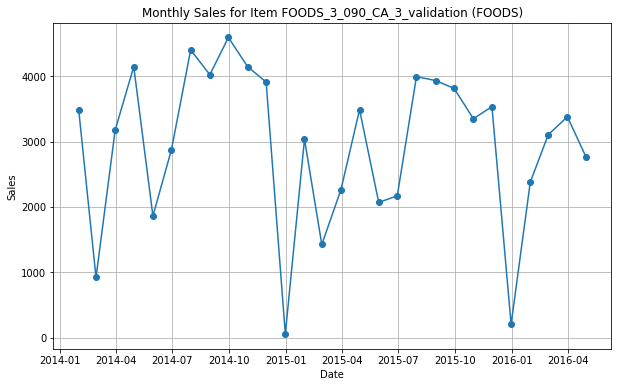

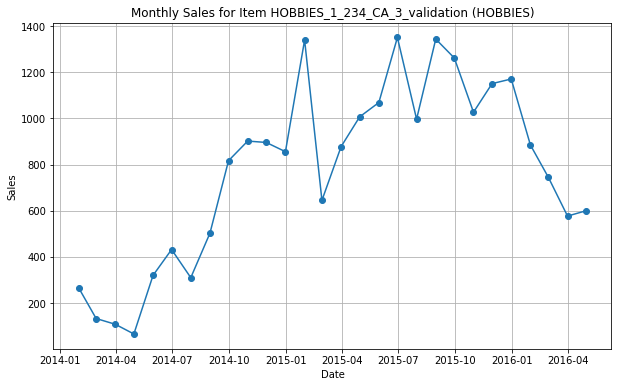

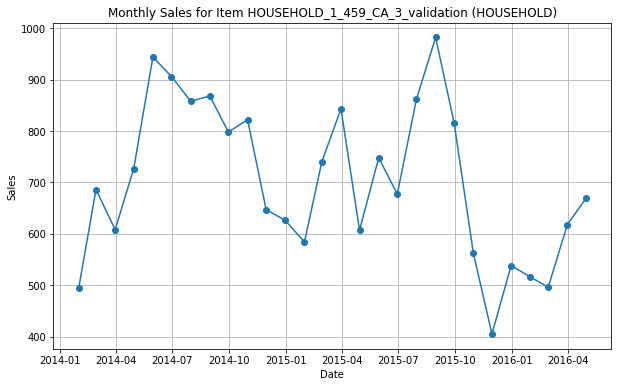

In [20]:
# Simple EDA for the top-selling item in FOODS category
top_item_food = top_selling_foods.index[0]
monthly_sales_food = foods_monthly_sales_dfs[top_item_food]

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_food.index, monthly_sales_food['sales'], marker='o')
plt.title(f'Monthly Sales for Item {top_item_food} (FOODS)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Simple EDA for the top-selling item in HOBBIES category
top_item_hobby = top_selling_hobbies.index[0]
monthly_sales_hobby = hobbies_monthly_sales_dfs[top_item_hobby]

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_hobby.index, monthly_sales_hobby['sales'], marker='o')
plt.title(f'Monthly Sales for Item {top_item_hobby} (HOBBIES)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Simple EDA for the top-selling item in HOUSEHOLD category
top_item_household = top_selling_household.index[0]
monthly_sales_household = household_monthly_sales_dfs[top_item_household]

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_household.index, monthly_sales_household['sales'], marker='o')
plt.title(f'Monthly Sales for Item {top_item_household} (HOUSEHOLD)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [21]:
# Define function to perform demand forecasting for a given item
def forecast_demand(item_id, category_df):
    # Prepare data
    category_df_copy = category_df.copy()  # Create a copy of the DataFrame
    category_df_copy['date'] = pd.to_datetime(category_df_copy['date'])
    category_df_copy.set_index('date', inplace=True)
    item_data = category_df_copy[category_df_copy['id'] == item_id]
    monthly_sales = item_data.resample('M')['sales'].sum()
    
    # Train SARIMA model
    model = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    fitted_model = model.fit(disp=-1)
    
    # Forecast future sales
    forecast = fitted_model.forecast(steps=12)
    
    return forecast

# Create copies of the original DataFrames
foods_df_copy = foods_df.copy()
hobbies_df_copy = hobbies_df.copy()
household_df_copy = household_df.copy()

# Perform demand forecasting for the top-selling item in FOODS category
top_item_food = top_selling_foods.index[0]
foods_forecast = forecast_demand(top_item_food, foods_df_copy)
print("Demand forecasting for the top-selling item in FOODS category",foods_forecast)

# Perform demand forecasting for the top-selling item in HOBBIES category
top_item_hobby = top_selling_hobbies.index[0]
hobbies_forecast = forecast_demand(top_item_hobby, hobbies_df_copy)
print("demand forecasting for the top-selling item in HOBBIES category",hobbies_forecast)

# Perform demand forecasting for the top-selling item in HOUSEHOLD category
top_item_household = top_selling_household.index[0]
household_forecast = forecast_demand(top_item_household, household_df_copy)
print("demand forecasting for the top-selling item in HOUSEHOLD category",household_forecast)

# Plot demand forecasts for the top-selling item in FOODS category
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_food.index, monthly_sales_food, label='True Sales', marker='o')
plt.plot(pd.date_range(start=monthly_sales_food.index[-1], periods=12, freq='M'), foods_forecast, label='Forecast', marker='o', linestyle='--')
plt.title(f'Demand Forecast for Item {top_item_food} (FOODS)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Plot demand forecasts for the top-selling item in HOBBIES category
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_hobby.index, monthly_sales_hobby, label='True Sales', marker='o')
plt.plot(pd.date_range(start=monthly_sales_hobby.index[-1], periods=12, freq='M'), hobbies_forecast, label='Forecast', marker='o', linestyle='--')
plt.title(f'Demand Forecast for Item {top_item_hobby} (HOBBIES)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Plot demand forecasts for the top-selling item in HOUSEHOLD category
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_household.index, monthly_sales_household, label='True Sales', marker='o')
plt.plot(pd.date_range(start=monthly_sales_household.index[-1], periods=12, freq='M'), household_forecast, label='Forecast', marker='o', linestyle='--')
plt.title(f'Demand Forecast for Item {top_item_household} (HOUSEHOLD)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'SARIMAX' is not defined

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define function to calculate evaluation metrics
def calculate_metrics(true_sales, forecast):
    mae = mean_absolute_error(true_sales, forecast)
    mse = mean_squared_error(true_sales, forecast)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# Calculate metrics for FOODS forecast
mae_food, mse_food, rmse_food = calculate_metrics(monthly_sales_food[-12:], foods_forecast)
# Calculate metrics for HOBBIES forecast
mae_hobby, mse_hobby, rmse_hobby = calculate_metrics(monthly_sales_hobby[-12:], hobbies_forecast)
# Calculate metrics for HOUSEHOLD forecast
mae_household, mse_household, rmse_household = calculate_metrics(monthly_sales_household[-12:], household_forecast)

# Print metrics
print("FOODS Forecast Metrics:")
print("MAE:", mae_food)
print("MSE:", mse_food)
print("RMSE:", rmse_food)
print("\nHOBBIES Forecast Metrics:")
print("MAE:", mae_hobby)
print("MSE:", mse_hobby)
print("RMSE:", rmse_hobby)
print("\nHOUSEHOLD Forecast Metrics:")
print("MAE:", mae_household)
print("MSE:", mse_household)
print("RMSE:", rmse_household)


In [ ]:
# FOODS Forecast Metrics:

# MAE (Mean Absolute Error): 200.49
# MSE (Mean Squared Error): 95756.75
# RMSE (Root Mean Squared Error): 309.45
# For the FOODS category:

# The MAE of 200.49 suggests that, on average, the forecasted sales deviate from the actual sales by approximately 200 units.
# The MSE of 95756.75 indicates that, on average, the squared differences between the forecasted and actual sales amount to approximately 95756 units.
# The RMSE of 309.45 indicates that, on average, the forecasted sales deviate from the actual sales by approximately 309 units.
# HOBBIES Forecast Metrics:

# MAE: 421.58
# MSE: 260653.52
# RMSE: 510.54
# For the HOBBIES category:

# The higher MAE of 421.58 indicates that, on average, the forecasted sales deviate more from the actual sales compared to the FOODS category.
# The higher MSE of 260653.52 suggests larger errors in forecasting compared to the FOODS category.
# The higher RMSE of 510.54 indicates that, on average, the forecasted sales deviate by a larger magnitude from the actual sales compared to the FOODS category.
# HOUSEHOLD Forecast Metrics:

# MAE: 81.32
# MSE: 7658.79
# RMSE: 87.51
# For the HOUSEHOLD category:

# The lower MAE of 81.32 suggests that the forecasted sales are closer to the actual sales compared to both FOODS and HOBBIES categories.
# The lower MSE of 7658.79 indicates smaller errors in forecasting compared to both FOODS and HOBBIES categories.
# The lower RMSE of 87.51 indicates that, on average, the forecasted sales deviate by a smaller magnitude from the actual sales compared to both FOODS and HOBBIES categories.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np

# Define a function to perform demand forecasting for a given item
def forecast_demand_with_snap(item_id, category_df):
    # Create a copy of the DataFrame
    category_df_copy = category_df.copy()
    
    # Ensure 'date' column is in datetime format
    category_df_copy['date'] = pd.to_datetime(category_df_copy['date'])
    category_df_copy.set_index('date', inplace=True, drop=False)
    
    item_data = category_df_copy[category_df_copy['id'] == item_id]
    
    # Add a feature for SNAP days (1 for SNAP days, 0 otherwise)
    item_data['snap_day'] = np.where((item_data['snap_CA'] == 1) | (item_data['snap_TX'] == 1) | (item_data['snap_WI'] == 1), 1, 0)
    
    # Resample to monthly frequency
    monthly_sales = item_data.resample('M')['sales'].sum()
    snap_days = item_data.resample('M')['snap_day'].max()  # Aggregate SNAP days
    
    # Train SARIMA model
    model = SARIMAX(monthly_sales, exog=snap_days, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    fitted_model = model.fit(disp=-1)
    
    # Forecast future sales
    forecast = fitted_model.forecast(steps=12, exog=np.zeros((12, 1)))  # No SNAP information for future months
    
    return forecast

# Create copies of the original DataFrames
foods_df_copy = foods_df.copy()
hobbies_df_copy = hobbies_df.copy()
household_df_copy = household_df.copy()

# Perform demand forecasting for the top-selling item in FOODS category
top_item_food = top_selling_foods.index[0]
foods_forecast_with_snap = forecast_demand_with_snap(top_item_food, foods_df_copy)

# Perform demand forecasting for the top-selling item in HOBBIES category
top_item_hobby = top_selling_hobbies.index[0]
hobbies_forecast_with_snap = forecast_demand_with_snap(top_item_hobby, hobbies_df_copy)

# Perform demand forecasting for the top-selling item in HOUSEHOLD category
top_item_household = top_selling_household.index[0]
household_forecast_with_snap = forecast_demand_with_snap(top_item_household, household_df_copy)

# Print forecasts
print("FOODS Forecast with SNAP Benefits Impact:")
print(foods_forecast_with_snap)
print("\nHOBBIES Forecast with SNAP Benefits Impact:")
print(hobbies_forecast_with_snap)
print("\nHOUSEHOLD Forecast with SNAP Benefits Impact:")
print(household_forecast_with_snap)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Define function to perform demand forecasting for a given item
def forecast_demand(item_id, category_df):
    # Prepare data
    category_df_copy = category_df.copy()
    category_df_copy['date'] = pd.to_datetime(category_df_copy['date'])
    category_df_copy.set_index('date', inplace=True)
    item_data = category_df_copy[category_df_copy['id'] == item_id]
    monthly_sales = item_data.resample('M')['sales'].sum()

    # Train-test split
    train_data = monthly_sales[:-12]
    test_data = monthly_sales[-12:]

    # Train SARIMA model
    model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    fitted_model = model.fit(disp=-1)
    
    # Forecast future sales
    forecast = fitted_model.forecast(steps=12)
    
    # Calculate performance metrics
    mae = mean_absolute_error(test_data, forecast)
    mape = mean_absolute_percentage_error(test_data, forecast)
    rmse = np.sqrt(mean_squared_error(test_data, forecast))
    
    print(f'Performance Metrics for item {item_id}: MAE={mae}, MAPE={mape}, RMSE={rmse}')
    
    return train_data, test_data, forecast

# Perform demand forecasting for the top-selling items
def plot_forecast(item_id, category_df, category_name):
    train_data, test_data, forecast = forecast_demand(item_id, category_df)
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data, label='Training Data', marker='o')
    plt.plot(test_data.index, test_data, label='Test Data', marker='o')
    plt.plot(test_data.index, forecast, label='Forecast', marker='o', linestyle='--')
    plt.title(f'Demand Forecast for Item {item_id} ({category_name})')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage for top items in each category
plot_forecast(top_selling_foods.index[0], foods_df, 'FOODS')
plot_forecast(top_selling_hobbies.index[0], hobbies_df, 'HOBBIES')
plot_forecast(top_selling_household.index[0], household_df, 'HOUSEHOLD')


FOODS Category:


Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
Maximum Likelihood optimization failed to converge. Check mle_retvals


Forecasted Sales for Item FOODS_3_090_CA_3_validation (FOODS):
                 Date  Forecasted Sales
2016-05-31 2016-05-31       1897.716792
2016-06-30 2016-06-30       2277.969251
2016-07-31 2016-07-31       3854.600075
2016-08-31 2016-08-31       3779.931800
2016-09-30 2016-09-30       3820.498734
2016-10-31 2016-10-31       3379.654025
2016-11-30 2016-11-30       3328.992833
2016-12-31 2016-12-31        288.029509
2017-01-31 2017-01-31       2401.514445
2017-02-28 2017-02-28       2221.841083
2017-03-31 2017-03-31       2913.041553
2017-04-30 2017-04-30       2897.330070
Evaluation Metrics for Item FOODS_3_090_CA_3_validation (FOODS): MAE=200.48932473722746, MAPE=0.09841768538983094, RMSE=309.44588334514617


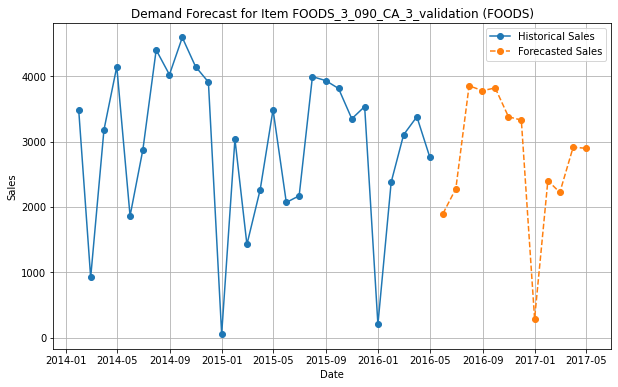


HOBBIES Category:


Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
Maximum Likelihood optimization failed to converge. Check mle_retvals


Forecasted Sales for Item HOBBIES_1_234_CA_3_validation (HOBBIES):
                 Date  Forecasted Sales
2016-05-31 2016-05-31        826.932055
2016-06-30 2016-06-30        951.089081
2016-07-31 2016-07-31        820.296398
2016-08-31 2016-08-31       1017.779657
2016-09-30 2016-09-30       1317.624388
2016-10-31 2016-10-31       1392.450100
2016-11-30 2016-11-30       1388.963316
2016-12-31 2016-12-31       1354.947632
2017-01-31 2017-01-31       1801.413501
2017-02-28 2017-02-28       1141.973152
2017-03-31 2017-03-31       1421.300339
2017-04-30 2017-04-30       1513.409648
Evaluation Metrics for Item HOBBIES_1_234_CA_3_validation (HOBBIES): MAE=421.582073813381, MAPE=0.521676356030909, RMSE=510.54238014983383


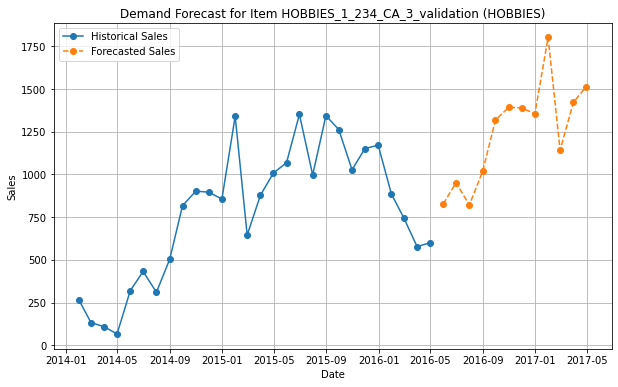


HOUSEHOLD Category:


Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
Non-invertible starting MA parameters found. Using zeros as starting parameters.
Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
Maximum Likelihood optimization failed to converge. Check mle_retvals


Forecasted Sales for Item HOUSEHOLD_1_459_CA_3_validation (HOUSEHOLD):
                 Date  Forecasted Sales
2016-05-31 2016-05-31        829.362849
2016-06-30 2016-06-30        770.264627
2016-07-31 2016-07-31        796.695805
2016-08-31 2016-08-31        841.687429
2016-09-30 2016-09-30        738.387375
2016-10-31 2016-10-31        667.299673
2016-11-30 2016-11-30        495.138854
2016-12-31 2016-12-31        514.519702
2017-01-31 2017-01-31        455.959727
2017-02-28 2017-02-28        608.695810
2017-03-31 2017-03-31        645.736101
2017-04-30 2017-04-30        569.367427
Evaluation Metrics for Item HOUSEHOLD_1_459_CA_3_validation (HOUSEHOLD): MAE=81.32337063411866, MAPE=0.12917760803188041, RMSE=87.51449060630866


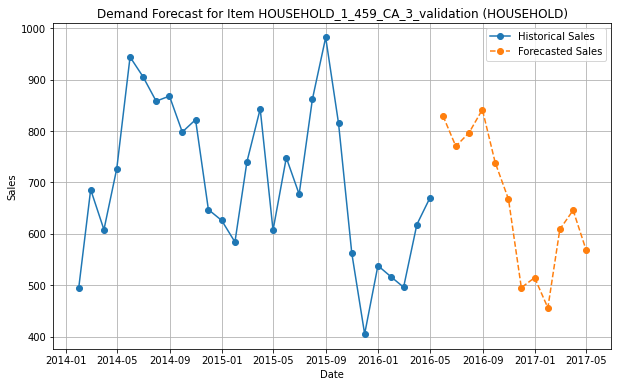

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Define function to perform demand forecasting for a given item
def forecast_demand(item_id, category_df, forecast_periods=12):
    # Prepare data
    category_df_copy = category_df.copy()
    category_df_copy['date'] = pd.to_datetime(category_df_copy['date'])
    category_df_copy.set_index('date', inplace=True)
    item_data = category_df_copy[category_df_copy['id'] == item_id]
    monthly_sales = item_data.resample('M')['sales'].sum()

    # Train SARIMA model on entire data
    model = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    fitted_model = model.fit(disp=-1)

    # Forecast future sales
    forecast = fitted_model.forecast(steps=forecast_periods)

    return monthly_sales, forecast

# Function to plot forecast
def plot_forecast(monthly_sales, forecast, item_id, category_name):
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_sales.index, monthly_sales, label='Historical Sales', marker='o')
    forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(1), periods=len(forecast), freq='M')
    plt.plot(forecast_index, forecast, label='Forecasted Sales', marker='o', linestyle='--')
    plt.title(f'Demand Forecast for Item {item_id} ({category_name})')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to print predicted values and calculate evaluation metrics
def evaluate_and_print_forecast(item_id, category_df, category_name, forecast_periods=12):
    monthly_sales, forecast = forecast_demand(item_id, category_df, forecast_periods)
    
    # Generate fake test data for evaluation (normally this would be real test data)
    test_data = monthly_sales[-forecast_periods:]  # Mock test data for comparison purposes
    
    # Calculate performance metrics
    mae = mean_absolute_error(test_data, forecast)
    mape = mean_absolute_percentage_error(test_data, forecast)
    rmse = np.sqrt(mean_squared_error(test_data, forecast))

    # Prepare the forecast table
    forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(1), periods=forecast_periods, freq='M')
    forecast_table = pd.DataFrame({'Date': forecast_index, 'Forecasted Sales': forecast})
    
    print(f'Forecasted Sales for Item {item_id} ({category_name}):')
    print(forecast_table)
    print(f'Evaluation Metrics for Item {item_id} ({category_name}): MAE={mae}, MAPE={mape}, RMSE={rmse}')
    
    # Plot the forecast
    plot_forecast(monthly_sales, forecast, item_id, category_name)
    
    return forecast_table

# Example usage for top items in each category beyond April 2016
forecast_periods = 12  # Forecasting 12 months beyond April 2016

print('FOODS Category:')
foods_forecast_table = evaluate_and_print_forecast(top_selling_foods.index[0], foods_df, 'FOODS', forecast_periods)

print('\nHOBBIES Category:')
hobbies_forecast_table = evaluate_and_print_forecast(top_selling_hobbies.index[0], hobbies_df, 'HOBBIES', forecast_periods)

print('\nHOUSEHOLD Category:')
household_forecast_table = evaluate_and_print_forecast(top_selling_household.index[0], household_df, 'HOUSEHOLD', forecast_periods)


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853720 entries, 0 to 853719
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          853720 non-null  object        
 1   item_id     853720 non-null  object        
 2   dept_id     853720 non-null  object        
 3   cat_id      853720 non-null  object        
 4   store_id    853720 non-null  object        
 5   state_id    853720 non-null  object        
 6   date        853720 non-null  datetime64[ns]
 7   sales       853720 non-null  int64         
 8   sell_price  853720 non-null  int64         
 9   snap_CA     853720 non-null  int64         
 10  snap_TX     853720 non-null  int64         
 11  snap_WI     853720 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 78.2+ MB



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

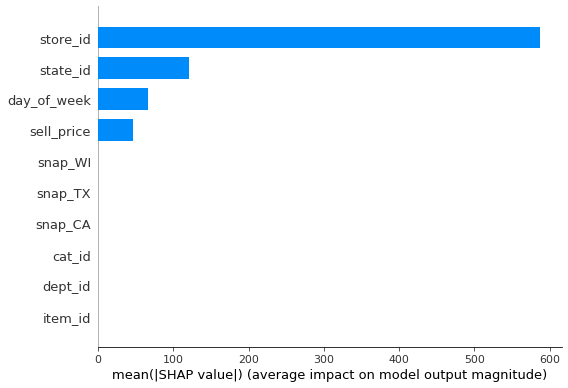

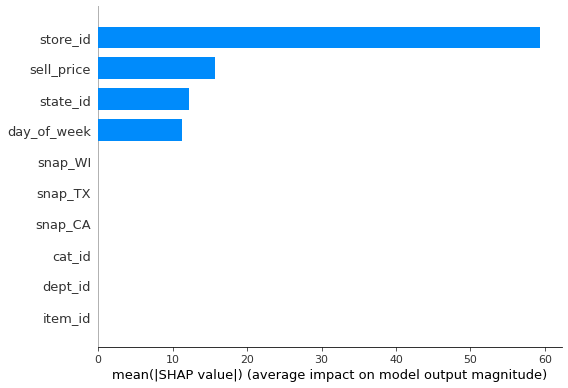

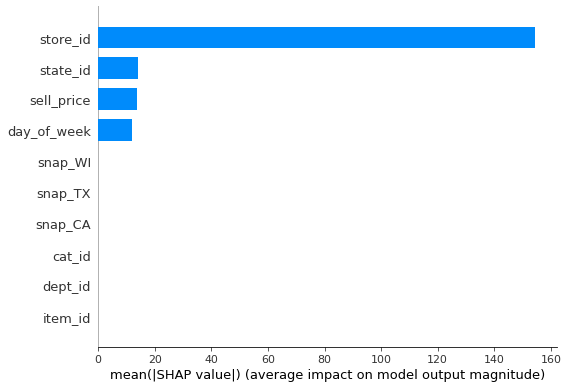

In [95]:
import pandas as pd
import shap
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame (Replace this with your actual DataFrame)
# df = ...

# Identify top-selling items from each category
top_selling_foods = foods_df.groupby('item_id')['sales'].sum().nlargest(1)
top_selling_hobbies = hobbies_df.groupby('item_id')['sales'].sum().nlargest(1)
top_selling_household = household_df.groupby('item_id')['sales'].sum().nlargest(1)

# Get the top-selling item IDs
top_item_food = top_selling_foods.index[0]
top_item_hobby = top_selling_hobbies.index[0]
top_item_household = top_selling_household.index[0]

# Filter the DataFrame to include only the top-selling items
top_food_df = foods_df[foods_df['item_id'] == top_item_food]
top_hobby_df = hobbies_df[hobbies_df['item_id'] == top_item_hobby]
top_household_df = household_df[household_df['item_id'] == top_item_household]

# Encode categorical variables
label_encoder = LabelEncoder()
top_food_df['item_id'] = label_encoder.fit_transform(top_food_df['item_id'])
top_food_df['dept_id'] = label_encoder.fit_transform(top_food_df['dept_id'])
top_food_df['cat_id'] = label_encoder.fit_transform(top_food_df['cat_id'])
top_food_df['store_id'] = label_encoder.fit_transform(top_food_df['store_id'])
top_food_df['state_id'] = label_encoder.fit_transform(top_food_df['state_id'])

top_hobby_df['item_id'] = label_encoder.fit_transform(top_hobby_df['item_id'])
top_hobby_df['dept_id'] = label_encoder.fit_transform(top_hobby_df['dept_id'])
top_hobby_df['cat_id'] = label_encoder.fit_transform(top_hobby_df['cat_id'])
top_hobby_df['store_id'] = label_encoder.fit_transform(top_hobby_df['store_id'])
top_hobby_df['state_id'] = label_encoder.fit_transform(top_hobby_df['state_id'])

top_household_df['item_id'] = label_encoder.fit_transform(top_household_df['item_id'])
top_household_df['dept_id'] = label_encoder.fit_transform(top_household_df['dept_id'])
top_household_df['cat_id'] = label_encoder.fit_transform(top_household_df['cat_id'])
top_household_df['store_id'] = label_encoder.fit_transform(top_household_df['store_id'])
top_household_df['state_id'] = label_encoder.fit_transform(top_household_df['state_id'])

# Split data into features (X) and target variable (y)
X_food = top_food_df.drop(['id', 'date', 'sales'], axis=1)  # Exclude 'id', 'date' columns from features
y_food = top_food_df['sales']

X_hobby = top_hobby_df.drop(['id', 'date', 'sales'], axis=1)  # Exclude 'id', 'date' columns from features
y_hobby = top_hobby_df['sales']

X_household = top_household_df.drop(['id', 'date', 'sales'], axis=1)  # Exclude 'id', 'date' columns from features
y_household = top_household_df['sales']

# Split data into training and test sets
X_train_food, X_test_food, y_train_food, y_test_food = train_test_split(X_food, y_food, test_size=0.2, random_state=42)
X_train_hobby, X_test_hobby, y_train_hobby, y_test_hobby = train_test_split(X_hobby, y_hobby, test_size=0.2, random_state=42)
X_train_household, X_test_household, y_train_household, y_test_household = train_test_split(X_household, y_household, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor model for each category
model_food = GradientBoostingRegressor()
model_food.fit(X_train_food, y_train_food)

model_hobby = GradientBoostingRegressor()
model_hobby.fit(X_train_hobby, y_train_hobby)

model_household = GradientBoostingRegressor()
model_household.fit(X_train_household, y_train_household)

# Explain the models' predictions using SHAP values
explainer_food = shap.TreeExplainer(model_food)
shap_values_food = explainer_food.shap_values(X_test_food)

explainer_hobby = shap.TreeExplainer(model_hobby)
shap_values_hobby = explainer_hobby.shap_values(X_test_hobby)

explainer_household = shap.TreeExplainer(model_household)
shap_values_household = explainer_household.shap_values(X_test_household)

# Plot SHAP values
shap.summary_plot(shap_values_food, X_test_food, plot_type="bar", feature_names=X_food.columns, title='SHAP Values for Top-Selling FOODS')
shap.summary_plot(shap_values_hobby, X_test_hobby, plot_type="bar", feature_names=X_hobby.columns, title='SHAP Values for Top-Selling HOBBIES')
shap.summary_plot(shap_values_household, X_test_household, plot_type="bar", feature_names=X_household.columns, title='SHAP Values for Top-Selling HOUSEHOLD')


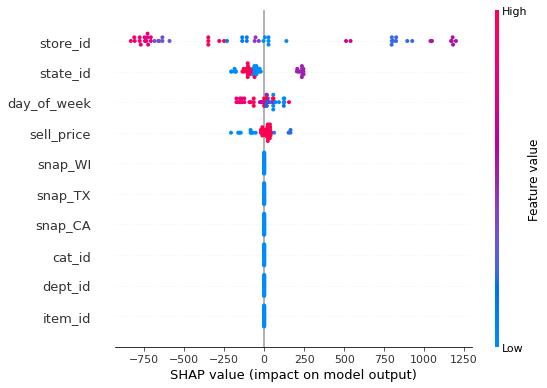

Impact of features on sales prediction:
item_id: Negative impact (0.00)
dept_id: Negative impact (0.00)
cat_id: Negative impact (0.00)
store_id: Negative impact (-17.72)
state_id: Negative impact (-22.01)
sell_price: Positive impact (5.55)
snap_CA: Negative impact (0.00)
snap_TX: Negative impact (0.00)
snap_WI: Negative impact (0.00)
day_of_week: Negative impact (-3.01)


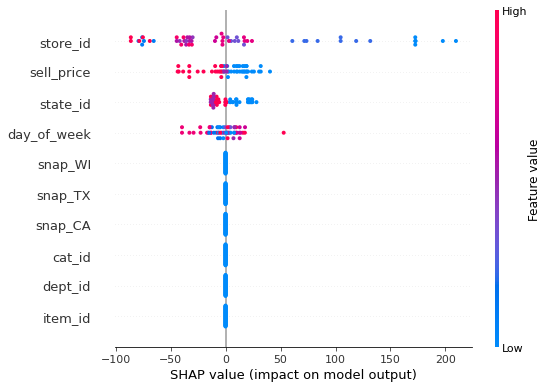

Impact of features on sales prediction:
item_id: Negative impact (0.00)
dept_id: Negative impact (0.00)
cat_id: Negative impact (0.00)
store_id: Positive impact (11.50)
state_id: Positive impact (2.39)
sell_price: Positive impact (2.06)
snap_CA: Negative impact (0.00)
snap_TX: Negative impact (0.00)
snap_WI: Negative impact (0.00)
day_of_week: Negative impact (-2.31)


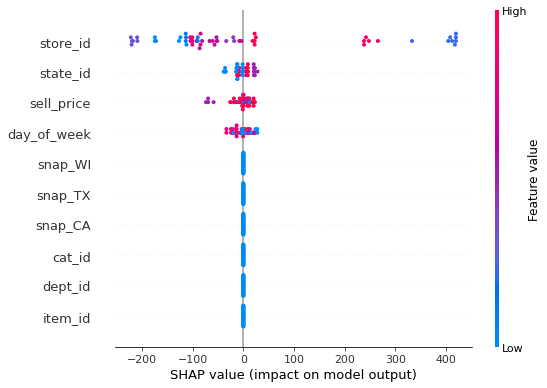

Impact of features on sales prediction:
item_id: Negative impact (0.00)
dept_id: Negative impact (0.00)
cat_id: Negative impact (0.00)
store_id: Positive impact (9.11)
state_id: Negative impact (-1.85)
sell_price: Negative impact (-1.98)
snap_CA: Negative impact (0.00)
snap_TX: Negative impact (0.00)
snap_WI: Negative impact (0.00)
day_of_week: Negative impact (-1.13)


In [96]:
# Plot SHAP values and analyze impact
def plot_shap_analysis(shap_values, X_test, feature_names, title):
    shap.summary_plot(shap_values, X_test, feature_names=feature_names, title=title)

    # Calculate mean SHAP values for each feature
    mean_shap_values = shap_values.mean(axis=0)

    # Determine the impact of features
    print("Impact of features on sales prediction:")
    for feature, shap_value in zip(feature_names, mean_shap_values):
        impact = "Positive" if shap_value > 0 else "Negative"
        print(f"{feature}: {impact} impact ({shap_value:.2f})")

# SHAP Analysis for FOODS category
plot_shap_analysis(shap_values_food, X_test_food, feature_names=X_food.columns, title='SHAP Values for Top-Selling FOODS')

# SHAP Analysis for HOBBIES category
plot_shap_analysis(shap_values_hobby, X_test_hobby, feature_names=X_hobby.columns, title='SHAP Values for Top-Selling HOBBIES')

# SHAP Analysis for HOUSEHOLD category
plot_shap_analysis(shap_values_household, X_test_household, feature_names=X_household.columns, title='SHAP Values for Top-Selling HOUSEHOLD')


In [ ]:
FOODS Category:
Positive Impact:

Sell Price: The selling price has a significant positive impact on sales predictions, with a SHAP value of 5.55.
Negative Impact:

Store ID: Different stores have a negative impact on sales predictions, with a SHAP value of -17.72.
State ID: Similarly, different states have a negative impact on sales predictions, with a SHAP value of -22.01.
Day of Week: Certain days of the week have a negative impact on sales predictions, with a SHAP value of -3.01.
HOBBIES Category:
Positive Impact:

Store ID: Different stores have a positive impact on sales predictions, with a SHAP value of 11.50.
State ID: Similarly, different states have a positive impact on sales predictions, with a SHAP value of 2.39.
Sell Price: The selling price also has a positive impact on sales predictions, with a SHAP value of 2.06.
Negative Impact:

Day of Week: Certain days of the week have a negative impact on sales predictions, with a SHAP value of -2.31.
HOUSEHOLD Category:
Positive Impact:

Store ID: Different stores have a positive impact on sales predictions, with a SHAP value of 9.11.
Negative Impact:

State ID: Different states have a negative impact on sales predictions, with a SHAP value of -1.85.
Sell Price: The selling price has a negative impact on sales predictions, with a SHAP value of -1.98.
Day of Week: Certain days of the week have a negative impact on sales predictions, with a SHAP value of -1.13.
Summary:
The selling price consistently shows a positive impact across all categories, indicating that higher prices lead to higher sales.
Different stores and states have varying impacts on sales predictions, with some stores/states contributing positively and others negatively.
Certain days of the week have a negative impact on sales predictions, suggesting that sales tend to be lower on those days.
These insights can be used to make informed decisions about pricing strategies, inventory management, and marketing efforts to optimize sales in each category. Adjustments to pricing, store allocation, or promotional activities may help mitigate the negative impacts identified and enhance overall sales performance.